# Test if iTBS decreases FDG uptake in the sgACC 

In [5]:
from nilearn.plotting import plot_stat_map, plot_roi
import os
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.colors import LinearSegmentedColormap
from tmsfdg_utils import make_spherical_roi 


path = '/Users/laurituominen/Documents/Research/FDGPET/petanalysis/tbsfdg/'

In [6]:
fsl_dir=os.environ['FSL_DIR']
mni152_brain=fsl_dir + '/data/standard/MNI152_T1_2mm_brain.nii.gz'

## Create a spherical ROI in sgACC

In [7]:
# sgACC based on https://doi.org/10.1016/j.biopsych.2012.04.028
fox_sgACC = make_spherical_roi(coordinates=[6, 16, -10], radius=5)

# alternative ROIs based on https://doi.org/10.1016/j.brs.2019.10.012
ge_sgACC = make_spherical_roi(coordinates=[2, 18, -8], radius=3)

ge_rACC = make_spherical_roi(coordinates=[3, 39, -2], radius=3)


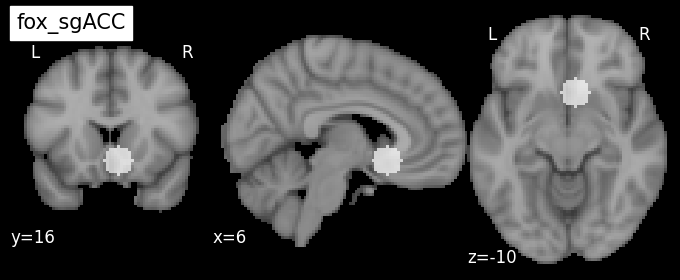

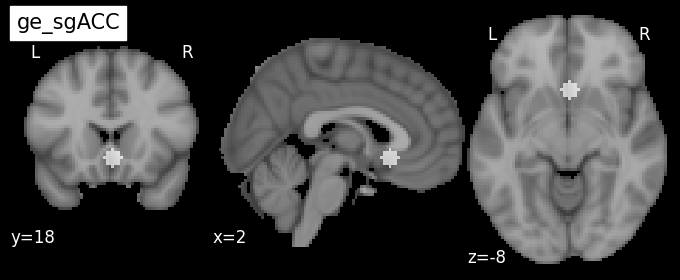

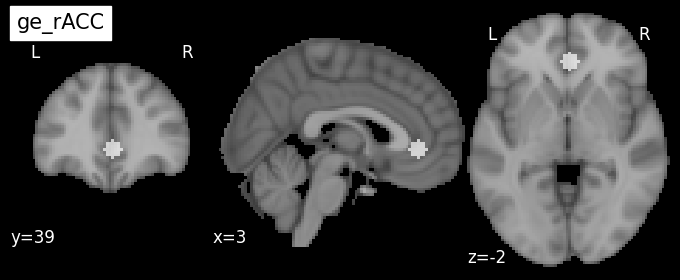

In [8]:
# Define a fully white colormap
white_cmap = LinearSegmentedColormap.from_list('white_cmap', ['white', 'white'])

rois = ['fox_sgACC', 'ge_sgACC', 'ge_rACC']
coordinates = [[6, 16, -10], [2, 18, -8], [3, 39, -2]]

for i in [0,1,2]:
    display = plot_roi(
        eval(rois[i]),
        title=rois[i], 
        bg_img= mni152_brain,
        colorbar=False,
        cmap= white_cmap,
        draw_cross=False,
        cut_coords=coordinates[i],
    );

display.savefig(path + '/figures/rois.png')

# Get osgm sig map

In [9]:
mni152_mask=nb.load(fsl_dir + '/data/standard/MNI152_T1_2mm_brain_mask.nii.gz').get_fdata()

data = nb.load('../group/active_vs_sham/osgm/sig.nii.gz').get_fdata()
affine = nb.load('../group/active_vs_sham/osgm/sig.nii.gz').affine
masked = data * mni152_mask
sig_map = nb.Nifti1Image(masked, affine)



# Plot rois & osgm

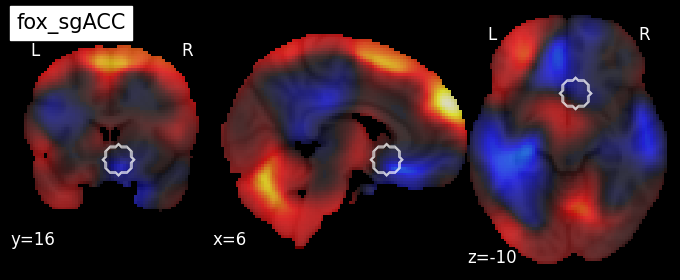

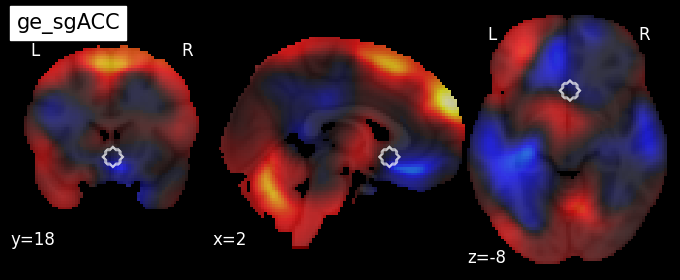

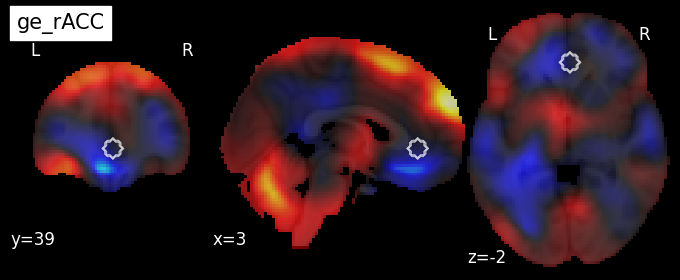

In [10]:
# Define a fully white colormap
white_cmap = LinearSegmentedColormap.from_list('white_cmap', ['white', 'white'])

rois = ['fox_sgACC', 'ge_sgACC', 'ge_rACC']
coordinates = [[6, 16, -10], [2, 18, -8], [3, 39, -2]]

for i in [0,1,2]:
    display = plot_stat_map(
        sig_map,
        title=rois[i], 
        bg_img= mni152_brain,
        alpha=0.7,
        colorbar=False,
        draw_cross=False,
        cut_coords=coordinates[i],
    );


    display.add_contours(eval(rois[i]), colors='white', linewidths=0.25)

display.savefig(path + '/figures/rois_osgm.png')



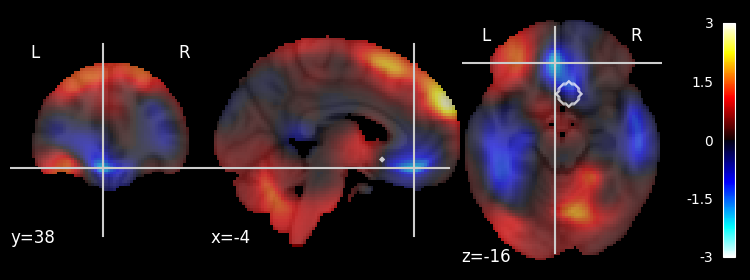

In [14]:
front = masked[:,:,:45]
xyz = np.concatenate(np.where(masked == np.min(front)))
coord = apply_affine(affine,xyz)

display = plot_stat_map(
    sig_map,
    bg_img=mni152_brain,
    threshold=0,
    draw_cross=True,
    alpha = 0.6,
    cut_coords=(coord)
);

display.add_contours(eval(rois[0]), colors='white', linewidths=0.25)
display.savefig(path + '/figures/max_frontal_effect_osgm_with_fox_sgACC.png')
